In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from pandas import DataFrame


from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [2]:
!ls
# dataset directory
# ./dataset/smart-meters-in-london

Kaggle- Clustering and exploring smart meter data.ipynb
analysis
dataset
energy.csv
example
hc_
hc_0.csv
hc_1.csv
hc_10.csv
hc_100.csv
hc_101.csv
hc_102.csv
hc_103.csv
hc_104.csv
hc_105.csv
hc_106.csv
hc_107.csv
hc_108.csv
hc_109.csv
hc_11.csv
hc_110.csv
hc_111.csv
hc_12.csv
hc_13.csv
hc_14.csv
hc_15.csv
hc_16.csv
hc_17.csv
hc_18.csv
hc_19.csv
hc_2.csv
hc_20.csv
hc_21.csv
hc_22.csv
hc_23.csv
hc_24.csv
hc_25.csv
hc_26.csv
hc_27.csv
hc_28.csv
hc_29.csv
hc_3.csv
hc_30.csv
hc_31.csv
hc_32.csv
hc_33.csv
hc_34.csv
hc_35.csv
hc_36.csv
hc_37.csv
hc_38.csv
hc_39.csv
hc_4.csv
hc_40.csv
hc_41.csv
hc_42.csv
hc_43.csv
hc_44.csv
hc_45.csv
hc_46.csv
hc_47.csv
hc_48.csv
hc_49.csv
hc_5.csv
hc_50.csv
hc_51.csv
hc_52.csv
hc_53.csv
hc_54.csv
hc_55.csv
hc_56.csv
hc_57.csv
hc_58.csv
hc_59.csv
hc_6.csv
hc_60.csv
hc_61.csv
hc_62.csv
hc_63.csv
hc_64.csv
hc_65.csv
hc_66.csv
hc_67.csv
hc_68.csv
hc_69.csv
hc_7.csv
hc_70.csv
hc_71.csv
hc_72.csv
hc_73.csv
hc_74.csv
hc_75.csv
hc_76.csv
hc_77.csv
hc_78.csv
hc_79.csv


In [3]:
energy = pd.read_csv('energy.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
energy

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0.0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,1.0,MAC000002,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,2.0,MAC000002,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,3.0,MAC000002,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,4.0,MAC000002,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...,...
7072010,9903.0,MAC004828,2014-02-24,0.0225,0.0538958,0.722,48,0.125341,2.587,0
7072011,9904.0,MAC004828,2014-02-25,0.005,0.015,0.051,48,0.0170294,0.72,0
7072012,9905.0,MAC004828,2014-02-26,0.011,0.0218958,0.152,48,0.0305379,1.051,0
7072013,9906.0,MAC004828,2014-02-27,0.0045,0.0153333,0.092,48,0.0204235,0.736,0


In [5]:
len(energy)

7072015

In [6]:
# 2011-11-23 ~ 2014-02-28 까지 총 5600여 가구의 데이터를 가지고 있음

In [7]:
energy.keys()

Index(['Unnamed: 0', 'LCLid', 'day', 'energy_median', 'energy_mean',
       'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min'],
      dtype='object')

In [8]:
df_energy = energy.loc[:, ['LCLid','day', 'energy_median','energy_mean',
       'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']]

In [9]:
df_energy

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000002,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,MAC000002,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,MAC000002,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,MAC000002,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,MAC000002,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...,...
7072010,MAC004828,2014-02-24,0.0225,0.0538958,0.722,48,0.125341,2.587,0
7072011,MAC004828,2014-02-25,0.005,0.015,0.051,48,0.0170294,0.72,0
7072012,MAC004828,2014-02-26,0.011,0.0218958,0.152,48,0.0305379,1.051,0
7072013,MAC004828,2014-02-27,0.0045,0.0153333,0.092,48,0.0204235,0.736,0


In [15]:
df_energy = df_energy.loc[:, ['day', 'energy_median','energy_mean',
       'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min']]

In [19]:
df_energy.day.value_counts()

2012-12-18    11182
2012-11-21    11162
2012-11-19    11162
2012-11-20    11162
2012-11-18    11160
              ...  
2011-11-26       82
2011-11-25       64
2011-11-24       50
2011-11-23       26
day               1
Name: day, Length: 830, dtype: int64

In [20]:
# 행 제거 day=day
# df_energy = df_energy.drop()
idx_day = df_energy[df_energy['day'] == 'day'].index
idx_day

Int64Index([3536007], dtype='int64')

In [21]:
df_energy =df_energy.drop(idx_day)

In [23]:
df_energy.day.value_counts()

2012-12-18    11182
2012-11-20    11162
2012-11-19    11162
2012-11-21    11162
2012-11-18    11160
              ...  
2011-11-26       82
2011-11-27       82
2011-11-25       64
2011-11-24       50
2011-11-23       26
Name: day, Length: 829, dtype: int64

In [182]:
# day 중복 제거 need??
df_energy_002 = df_energy_002.drop_duplicates('day', keep='first')

In [24]:
df_energy

,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
1,2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2,2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
3,2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
4,2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...,...
7072010,2014-02-24,0.0225,0.0538958,0.722,48,0.125341,2.587,0
7072011,2014-02-25,0.005,0.015,0.051,48,0.0170294,0.72,0
7072012,2014-02-26,0.011,0.0218958,0.152,48,0.0305379,1.051,0
7072013,2014-02-27,0.0045,0.0153333,0.092,48,0.0204235,0.736,0


In [25]:
df_energy['day'] = pd.to_datetime(df_energy['day'])
df_energy.set_index('day', inplace=True)


In [26]:
df_energy

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
day,,,,,,,
2012-10-12,0.1385,0.154304,0.886,46,0.196034,7.098,0
2012-10-13,0.18,0.230979,0.933,48,0.192329,11.087,0.076
2012-10-14,0.158,0.275479,1.085,48,0.274647,13.223,0.07
2012-10-15,0.131,0.213688,1.164,48,0.224483,10.257,0.07
2012-10-16,0.145,0.203521,0.991,48,0.184115,9.769,0.087
...,...,...,...,...,...,...,...
2014-02-24,0.0225,0.0538958,0.722,48,0.125341,2.587,0
2014-02-25,0.005,0.015,0.051,48,0.0170294,0.72,0
2014-02-26,0.011,0.0218958,0.152,48,0.0305379,1.051,0


In [27]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_energy) #값을 0~1로 떨어뜨린다

In [28]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
      cols.append(df.shift(i))
      names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
          names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
          names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = pd.concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
      agg.dropna(inplace=True)
  return agg

In [29]:
reframed = series_to_supervised(scaled, 1, 1) #t-1시점,t시점 데이터를 한 행으로 둔다     

In [30]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
1,0.019869,0.022272,0.082334,0.958333,0.048709,0.021344,0.000000,0.025823,0.033339,0.086702,1.0,0.047789,0.033339,0.011649
2,0.025823,0.033339,0.086702,1.000000,0.047789,0.033339,0.011649,0.022667,0.039762,0.100827,1.0,0.068243,0.039762,0.010730
3,0.022667,0.039762,0.100827,1.000000,0.068243,0.039762,0.010730,0.018793,0.030843,0.108168,1.0,0.055778,0.030843,0.010730
4,0.018793,0.030843,0.108168,1.000000,0.055778,0.030843,0.010730,0.020802,0.029376,0.092092,1.0,0.045748,0.029376,0.013335
5,0.020802,0.029376,0.092092,1.000000,0.045748,0.029376,0.013335,0.021232,0.032731,0.072856,1.0,0.045821,0.032731,0.010270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7072008,0.001291,0.002267,0.004646,1.000000,0.004454,0.002267,0.000000,0.000646,0.002054,0.004368,1.0,0.004086,0.002054,0.000000
7072009,0.000646,0.002054,0.004368,1.000000,0.004086,0.002054,0.000000,0.003228,0.007779,0.067094,1.0,0.031144,0.007779,0.000000
7072010,0.003228,0.007779,0.067094,1.000000,0.031144,0.007779,0.000000,0.000717,0.002165,0.004739,1.0,0.004231,0.002165,0.000000
7072011,0.000717,0.002165,0.004739,1.000000,0.004231,0.002165,0.000000,0.001578,0.003160,0.014125,1.0,0.007588,0.003160,0.000000


In [38]:
values = reframed.values
# split_date = pd.Timestamp('31-12-2013')
# n_train_hours = 365 * 24 #1년치 데이터만 가져온다

n_train_hours = 5270000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [46]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(5270000, 1, 13)
(1756410, 1, 13)
(5270000,)
(1756410,)


In [47]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(50, return_sequences=False)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

TypeError: Error converting shape to a TensorShape: Dimension value must be integer or None or have an __index__ method, got (5270000, 1, 13).

In [40]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

history = model.fit(train_X, train_y, epochs=100, batch_size=30, 
        validation_data=(test_X, test_y), verbose=2, shuffle=False, callbacks=[early_stop])

Train on 5270000 samples, validate on 1756410 samples
Epoch 1/100
 - 203s - loss: 0.0022 - val_loss: 0.0018
Epoch 2/100
 - 202s - loss: 0.0018 - val_loss: 0.0018
Epoch 3/100
 - 203s - loss: 0.0018 - val_loss: 0.0018
Epoch 4/100
 - 204s - loss: 0.0017 - val_loss: 0.0018
Epoch 5/100
 - 205s - loss: 0.0017 - val_loss: 0.0017
Epoch 6/100
 - 203s - loss: 0.0017 - val_loss: 0.0017
Epoch 7/100
 - 203s - loss: 0.0017 - val_loss: 0.0017
Epoch 8/100
 - 203s - loss: 0.0017 - val_loss: 0.0017
Epoch 9/100
 - 204s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/100
 - 203s - loss: 0.0017 - val_loss: 0.0017
Epoch 11/100
 - 209s - loss: 0.0016 - val_loss: 0.0016
Epoch 12/100
 - 212s - loss: 0.0016 - val_loss: 0.0017
Epoch 13/100
 - 211s - loss: 0.0016 - val_loss: 0.0016
Epoch 14/100
 - 202s - loss: 0.0016 - val_loss: 0.0016
Epoch 15/100
 - 203s - loss: 0.0016 - val_loss: 0.0016
Epoch 16/100
 - 205s - loss: 0.0016 - val_loss: 0.0016
Epoch 17/100
 - 204s - loss: 0.0016 - val_loss: 0.0016
Epoch 18/100
 - 204s

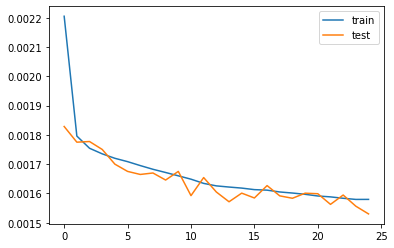

In [41]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [51]:
y_pred = model.predict(test_X)
y_test_ = np.argmax(test_y, axis=1)
print(accuracy_score(y_pred, test_y))

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# end list multi variable